In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense

import matplotlib as plt
get_ipython().magic(u'matplotlib inline')

import datetime as dt, itertools, pandas as pd, matplotlib.pyplot as plt, numpy as np


In [4]:
def split_sequence(sequence, n_steps=7, lookahead=0):
    X, y = list(), list()
    for i in range(lookahead,len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i-lookahead:end_ix-lookahead], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Data preprocessing

In [5]:
tsdataframe = pd.read_csv('timeseries_lab3.csv')
tsdataframe

,Date,Price
0,1/1/2006,569.865168
1,1/2/2006,593.271930
2,1/3/2006,606.471193
3,1/4/2006,576.932773
4,1/5/2006,573.812500
...,...,...
3647,12/27/2015,832.554167
3648,12/28/2015,880.513919
3649,12/29/2015,856.883910
3650,12/30/2015,888.002212


In [6]:
tsdata = np.load('timeseries_lab3.npy')

In [7]:
tsdata

array([569.86516854, 593.27192983, 606.47119342, ..., 856.88391039,
       888.00221239, 918.49879518])

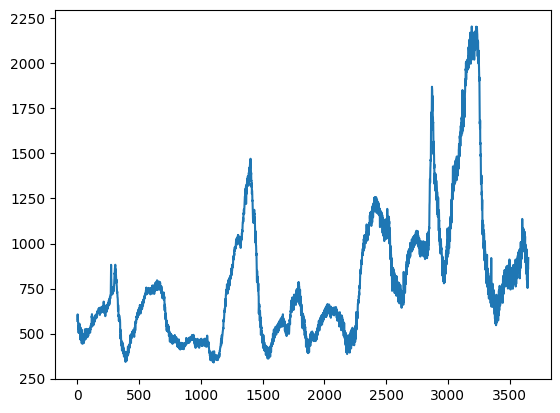

In [8]:
plt.plot(tsdata)

In [9]:
n_steps=7
n_features = 1
train_size = 2557

In [10]:
X, y = split_sequence(tsdata,n_steps)

In [11]:
X

array([[569.86516854, 593.27192983, 606.47119342, ..., 573.8125    ,
        576.17699115, 548.16748768],
       [593.27192983, 606.47119342, 576.93277311, ..., 576.17699115,
        548.16748768, 528.13043478],
       [606.47119342, 576.93277311, 573.8125    , ..., 548.16748768,
        528.13043478, 543.19517544],
       ...,
       [876.92110454, 923.34583333, 807.89142857, ..., 865.42385787,
        832.55416667, 880.51391863],
       [923.34583333, 807.89142857, 753.03703704, ..., 832.55416667,
        880.51391863, 856.88391039],
       [807.89142857, 753.03703704, 865.42385787, ..., 880.51391863,
        856.88391039, 888.00221239]])

In [12]:
#tsdata[:15]

In [13]:
#X[:10]

In [14]:
#y[:4]

In [15]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
trainX = X[:train_size]
trainy = y[:train_size]
testX = X[train_size:]
testy = y[train_size:]

In [16]:
#trainX

### LSTM model for time series prediction

In [17]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.fit(trainX, trainy, epochs=20, verbose=1)

Epoch 1/20
80/80 [==============================] - 7s 13ms/step - loss: 111261.5000
Epoch 2/20
80/80 [==============================] - 1s 13ms/step - loss: 827.8722
Epoch 3/20
80/80 [==============================] - 1s 13ms/step - loss: 797.5995
Epoch 4/20
80/80 [==============================] - 1s 13ms/step - loss: 803.0634
Epoch 5/20
80/80 [==============================] - 1s 13ms/step - loss: 776.7015
Epoch 6/20
80/80 [==============================] - 1s 13ms/step - loss: 748.6005
Epoch 7/20
80/80 [==============================] - 1s 12ms/step - loss: 729.2396
Epoch 8/20
80/80 [==============================] - 1s 18ms/step - loss: 716.4100
Epoch 9/20
80/80 [==============================] - 2s 26ms/step - loss: 715.1473
Epoch 10/20
80/80 [==============================] - 2s 19ms/step - loss: 698.3608
Epoch 11/20
80/80 [==============================] - 1s 13ms/step - loss: 683.7850
Epoch 12/20
80/80 [==============================] - 1s 13ms/step - loss: 680.7894
Epoch 13/2

### Prediction (test set)

In [19]:
yhat = model.predict(testX, verbose=0)

In [20]:
pred = []
for i in range(yhat.shape[0]):
    pred.append(yhat[i])
pred = np.array(pred)

Text(0.5, 0, 'Days')

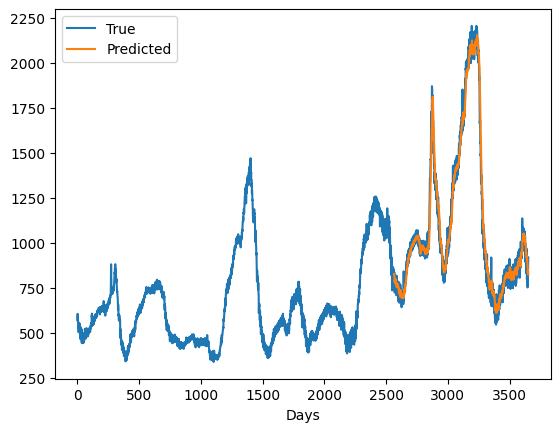

In [21]:
plt.plot(range(len(tsdata)),tsdata,label='True')
plt.plot(range(len(tsdata)-len(testy),len(tsdata)),pred,label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Days')



## Lab 4: Language Model

<b>Problem statement:</b> Use the following dataset containing element names to train a language model. Generate new names using the trained model. The generated names should resemble element names, e.g. ends with '-ium'

### Data

In [25]:
data = open('/content/elements.txt', 'r').read()
data= data.lower()
chars = list(set('\n'.join(data)))
data_size, vocab_size = len(data), len(chars)
char_to_index = { ch:i for i,ch in enumerate(chars) }
index_to_char = { i:ch for i,ch in enumerate(chars) }
char_to_index[' '] = len(chars)
data_size, vocab_size = len(data), len(chars)

In [26]:
data

'hydrogen\nhelium\nlithium\nberyllium\nboron\ncarbon\nnitrogen\noxygen\nfluorine\nneon\nsodium\nmagnesium\naluminium\nsilicon\nphosphorus\nsulfur\nchlorine\nargon\npotassium\ncalcium\nscandium\ntitanium\nvanadium\nchromium\nmanganese\niron\ncobalt\nnickel\ncopper\nzinc\ngallium\ngermanium\narsenic\nselenium\nbromine\nkrypton\nrubidium\nstrontium\nyttrium\nzirconium\nniobium\nmolybdenum\ntechnetium\nruthenium\nrhodium\npalladium\nsilver\ncadmium\nindium\ntin\nantimony\ntellurium\niodine\nxenon\ncesium\nbarium\nlanthanum\ncerium\npraseodymium\nneodymium\npromethium\nsamarium\neuropium\ngadolinium\nterbium\ndysprosium\nholmium\nerbium\nthulium\nytterbium\nlutetium\nhafnium\ntantalum\ntungsten\nrhenium\nosmium\niridium\nplatinum\ngold\nmercury\nthallium\nlead\nbismuth\npolonium\nastatine\nradon\nfrancium\nradium\nactinium\nthorium\nprotactinium\nuranium\nneptunium\nplutonium\namericium\ncurium\nberkelium\ncalifornium\neinsteinium\nfermium\nmendelevium\nnobelium\nlawrencium\nrutherfordium\n

### Model Architecture

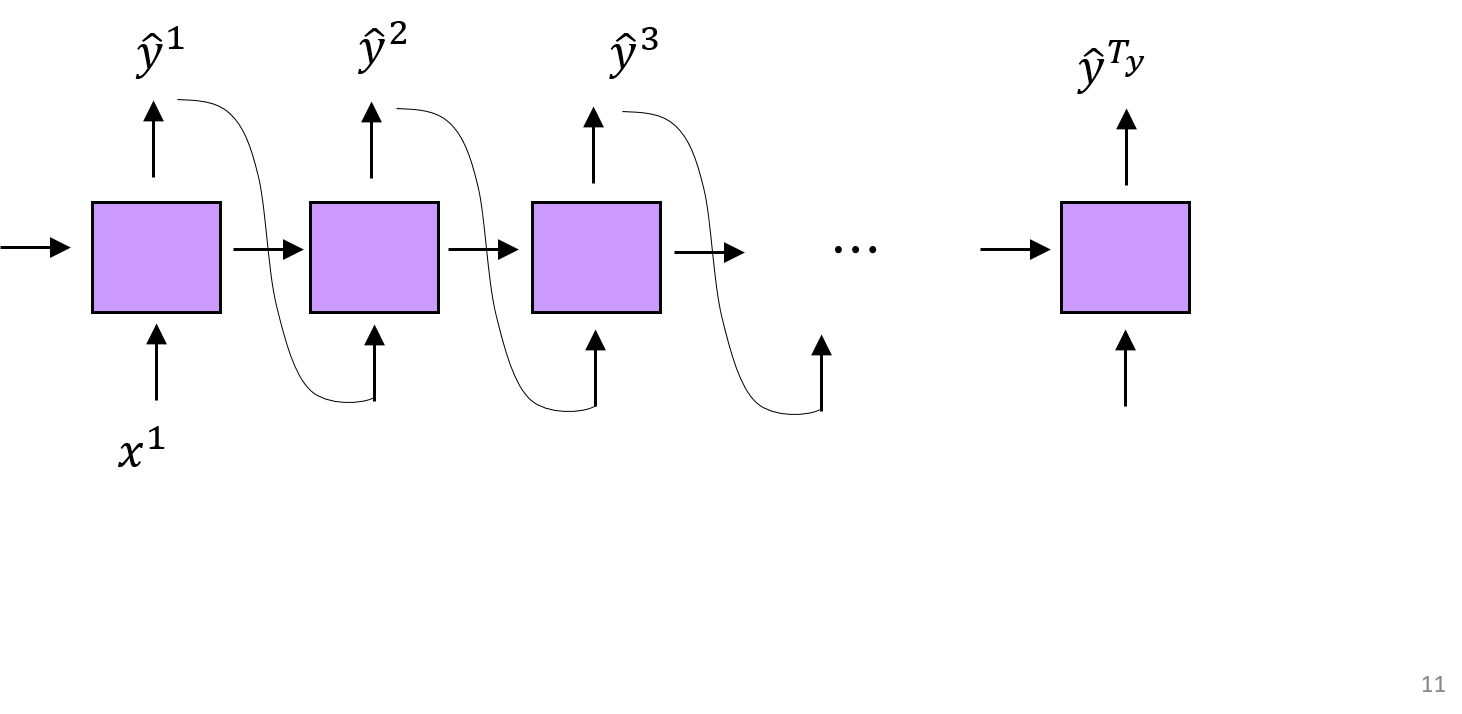

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
# Read and preprocess the dataset
with open('/content/elements.txt') as file:
    raw_text = file.read().split()

unique_chars = sorted(set(''.join(raw_text)))

char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
index_to_char = {idx: char for idx, char in enumerate(unique_chars)}
encoded_text = [char_to_index[char] for char in ''.join(raw_text)]

sequence_length = 10
sequences = []
for i in range(len(encoded_text) - sequence_length):
    sequences.append(encoded_text[i:i + sequence_length])

X = np.array(sequences)
y = tf.keras.utils.to_categorical(X[:, -1], num_classes=len(unique_chars))
X = X[:, :-1]

In [29]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(unique_chars), output_dim=128, input_length=sequence_length-1),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(unique_chars), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=120, verbose=1)


Epoch 1/120
29/29 [==============================] - 7s 22ms/step - loss: 3.0237
Epoch 2/120
29/29 [==============================] - 0s 13ms/step - loss: 2.8198
Epoch 3/120
29/29 [==============================] - 0s 13ms/step - loss: 2.7841
Epoch 4/120
29/29 [==============================] - 0s 8ms/step - loss: 2.7827
Epoch 5/120
29/29 [==============================] - 0s 6ms/step - loss: 2.7845
Epoch 6/120
29/29 [==============================] - 0s 7ms/step - loss: 2.7540
Epoch 7/120
29/29 [==============================] - 0s 7ms/step - loss: 2.6553
Epoch 8/120
29/29 [==============================] - 0s 7ms/step - loss: 2.5293
Epoch 9/120
29/29 [==============================] - 0s 7ms/step - loss: 2.4249
Epoch 10/120
29/29 [==============================] - 0s 10ms/step - loss: 2.3661
Epoch 11/120
29/29 [==============================] - 0s 7ms/step - loss: 2.3409
Epoch 12/120
29/29 [==============================] - 0s 7ms/step - loss: 2.3165
Epoch 13/120
29/29 [=============

In [31]:
# Generate words ending with 'ium'
generated_words = []
while len(generated_words) < 10:
    start = np.random.randint(0, len(encoded_text) - sequence_length)
    seq = encoded_text[start:start + sequence_length - 1]
    generated_text = ''.join([index_to_char[i] for i in seq])

    for i in range(20):
        x = np.array([seq])
        y_pred = model.predict(x)[0]
        next_char = index_to_char[np.argmax(y_pred)]
        generated_text += next_char
        seq = seq[1:] + [char_to_index[next_char]]

        if generated_text.endswith('ium'):
            generated_words.append(generated_text)
            break


1/1 [==============================] - 0s 21ms/step


In [32]:
print(generated_words)

['mlithiumberyllium', 'iummeitnerium', 'lmiumerbium', 'umrhodiumpalladium', 'admiumindium', 'keliumcalifornium', 'tiniumuranium', 'niumseaborgium', 'enheliumlithium', 'alumtungstenrhenium']
